# Neural Network modelling

In this notebook we are going to build neural network models on our full dataset and small size datasets. For the full size dataset we will build two models. One where we do not pay attention to class imbalance and one where we do. For the small size dataset where we have not manually balanced the data, we will create two models with the same procedure as with the full size dataset. However, with the manually balanced small dataset we will create the model without using the parameter class_weight. In this way, we can compare whether it works best to manually balance the dataset or use the built in parameter class_weight in a Neural network.

# Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

## Neural Network on the full size dataset

### Loading and splittig the data

In [47]:
df_full_size = pd.read_csv('/content/drive/MyDrive/BDA final project/data-full-size.csv')
df_full_size

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381104,381105,1,74,1,1,0,30170.0,88,0,...,0,0,0,0,0,0,0,1,0,0
381105,381105,381106,1,30,1,1,0,40016.0,131,0,...,0,0,0,0,0,0,0,0,1,0
381106,381106,381107,1,21,1,1,0,35118.0,161,0,...,0,0,0,0,0,1,0,0,1,0
381107,381107,381108,0,68,1,0,1,44617.0,74,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_full_size = df_full_size.iloc[:,2:]
df_full_size.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_full_size['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
X = df_full_size.drop('Response', axis = 1)
y = df_full_size['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [ ]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')

In [ ]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [ ]:
#Example of scaled feature
X_train_scaled[0][0]

-0.2454985995712122

In [ ]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


In [ ]:
#Number of features
X.shape[1]

218

### Constructing the models and tuning

In [49]:
#This function will be used to create models throughout the notebook. 
def design_model(modelname):
  modelname = Sequential(name=modelname)

  input = layers.InputLayer(input_shape = X.shape[1])
  modelname.add(input)
  modelname.add(layers.Dense(64, activation='relu'))
  modelname.add(layers.Dropout(0.2))
  modelname.add(layers.Dense(32, activation='relu'))
  modelname.add(layers.Dropout(0.1))
  modelname.add(layers.Dense(1, activation='sigmoid'))

  return modelname

In [ ]:
network_full_size = design_model('network_full_size')
network_full_size.summary()

Model: "network_full_size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                14016     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_full_size.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [50]:
es = EarlyStopping(monitor='accuracy', patience = 4)

In [ ]:
network_full_size_history = network_full_size.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 70, callbacks = [es])

Epoch 1/70
8039/8039 [==============================] - 37s 4ms/step - loss: 0.2715 - accuracy: 0.8769 - val_loss: 0.2665 - val_accuracy: 0.8784
Epoch 2/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2671 - accuracy: 0.8770 - val_loss: 0.2657 - val_accuracy: 0.8784
Epoch 3/70
8039/8039 [==============================] - 37s 5ms/step - loss: 0.2666 - accuracy: 0.8770 - val_loss: 0.2655 - val_accuracy: 0.8785
Epoch 4/70
8039/8039 [==============================] - 40s 5ms/step - loss: 0.2660 - accuracy: 0.8772 - val_loss: 0.2649 - val_accuracy: 0.8786
Epoch 5/70
8039/8039 [==============================] - 32s 4ms/step - loss: 0.2656 - accuracy: 0.8772 - val_loss: 0.2653 - val_accuracy: 0.8784
Epoch 6/70
8039/8039 [==============================] - 32s 4ms/step - loss: 0.2651 - accuracy: 0.8770 - val_loss: 0.2661 - val_accuracy: 0.8782
Epoch 7/70
8039/8039 [==============================] - 33s 4ms/step - loss: 0.2649 - accuracy: 0.8769 - val_loss: 0.2651 - val_ac

[Working with imbalanced data in Keras](https://keras.io/examples/structured_data/imbalanced_classification/)

In [ ]:
counts = np.bincount(y_train)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
class_weight_full_size = {0: weight_for_0, 1: weight_for_1}
print('Weight for 0(Not interested) {:.10f}, weight for 1(Interested) {:.10f}'.format(weight_for_0, weight_for_1))

Weight for 0(Not interested) 0.0000039886, weight for 1(Interested) 0.0000284746


In [ ]:
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)))

Number of positive samples in training data: 35119 (12.29% of total)


In [ ]:
network_full_size_balanced = design_model('network_full_size_balanced')

In [ ]:
network_full_size_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_network_full_size_balanced = network_full_size_balanced.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es], 
                             class_weight = class_weight_full_size)

Epoch 1/70
8039/8039 [==============================] - 36s 4ms/step - loss: 3.1380e-06 - accuracy: 0.6883 - val_loss: 0.4720 - val_accuracy: 0.7015
Epoch 2/70
8039/8039 [==============================] - 34s 4ms/step - loss: 2.9867e-06 - accuracy: 0.6959 - val_loss: 0.4758 - val_accuracy: 0.6901
Epoch 3/70
8039/8039 [==============================] - 34s 4ms/step - loss: 2.9737e-06 - accuracy: 0.6963 - val_loss: 0.4683 - val_accuracy: 0.6974
Epoch 4/70
8039/8039 [==============================] - 34s 4ms/step - loss: 2.9681e-06 - accuracy: 0.6969 - val_loss: 0.4663 - val_accuracy: 0.7025
Epoch 5/70
8039/8039 [==============================] - 34s 4ms/step - loss: 2.9601e-06 - accuracy: 0.6986 - val_loss: 0.4911 - val_accuracy: 0.6835
Epoch 6/70
8039/8039 [==============================] - 34s 4ms/step - loss: 2.9515e-06 - accuracy: 0.7001 - val_loss: 0.4745 - val_accuracy: 0.6797
Epoch 7/70
8039/8039 [==============================] - 34s 4ms/step - loss: 2.9475e-06 - accuracy: 0.6999

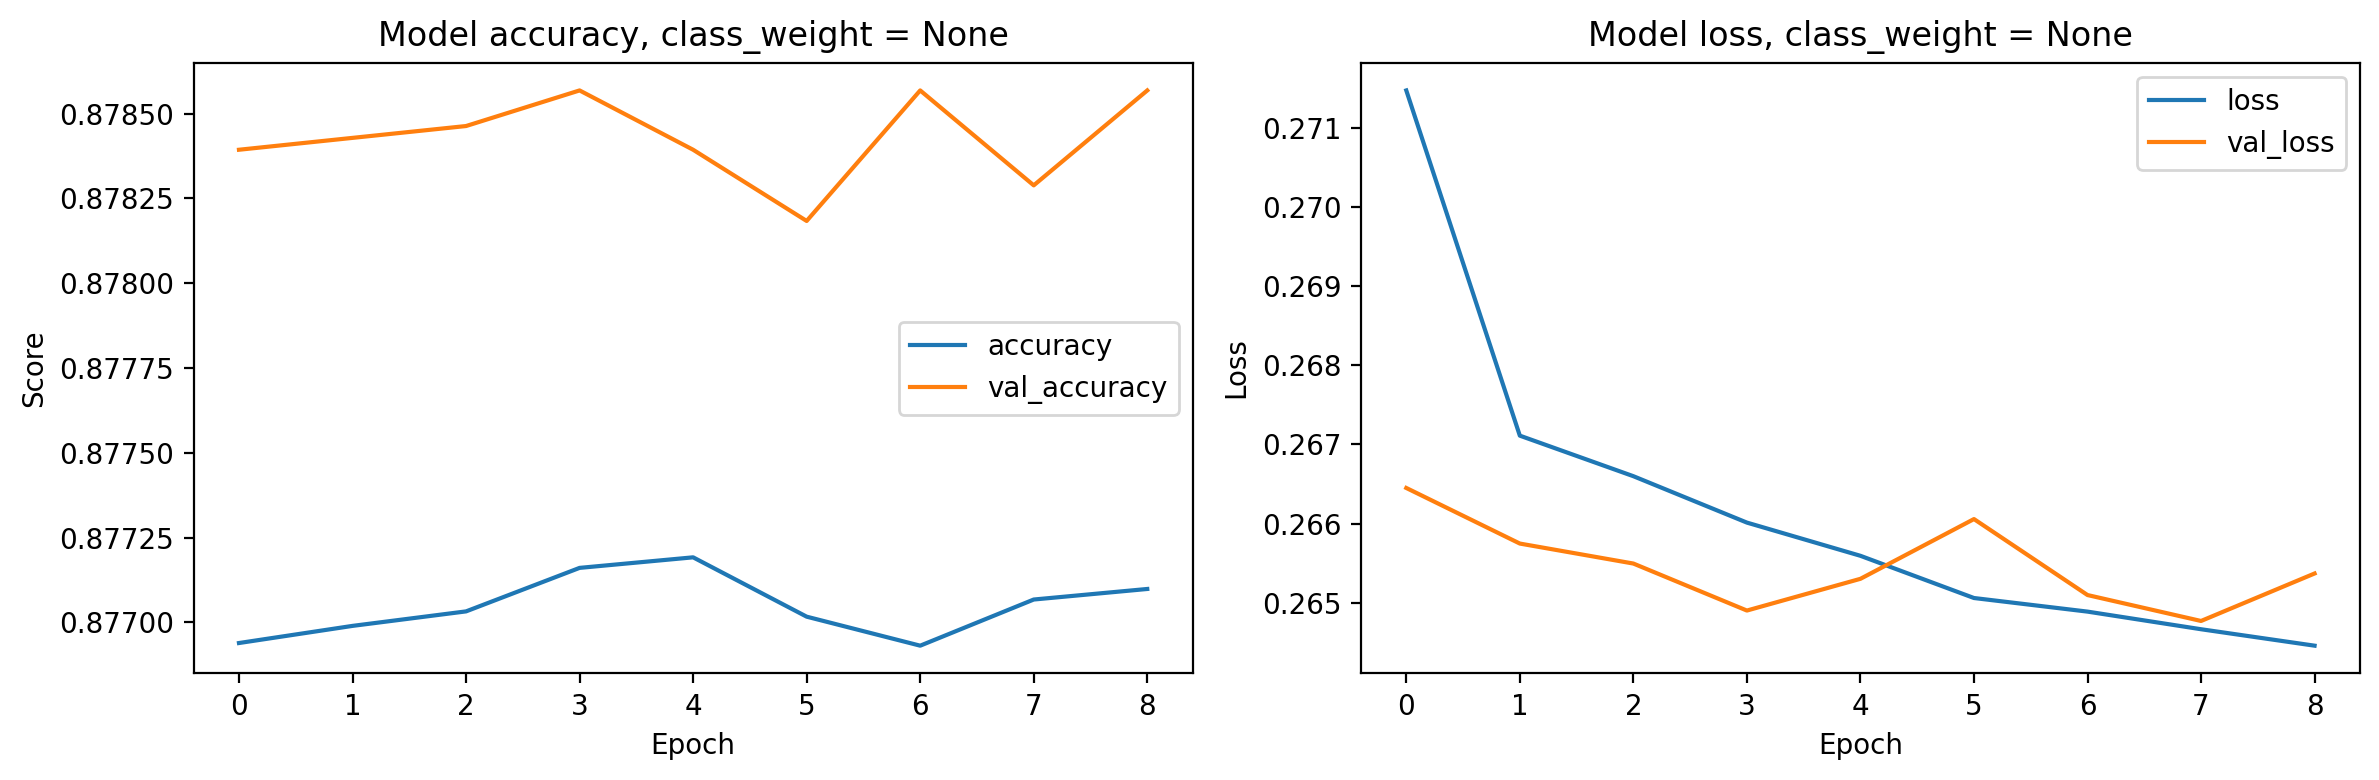

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(network_full_size_history.history['accuracy'], label = 'accuracy')
ax[0].plot(network_full_size_history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = None', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(network_full_size_history.history['loss'], label = 'loss')
ax[1].plot(network_full_size_history.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = None', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

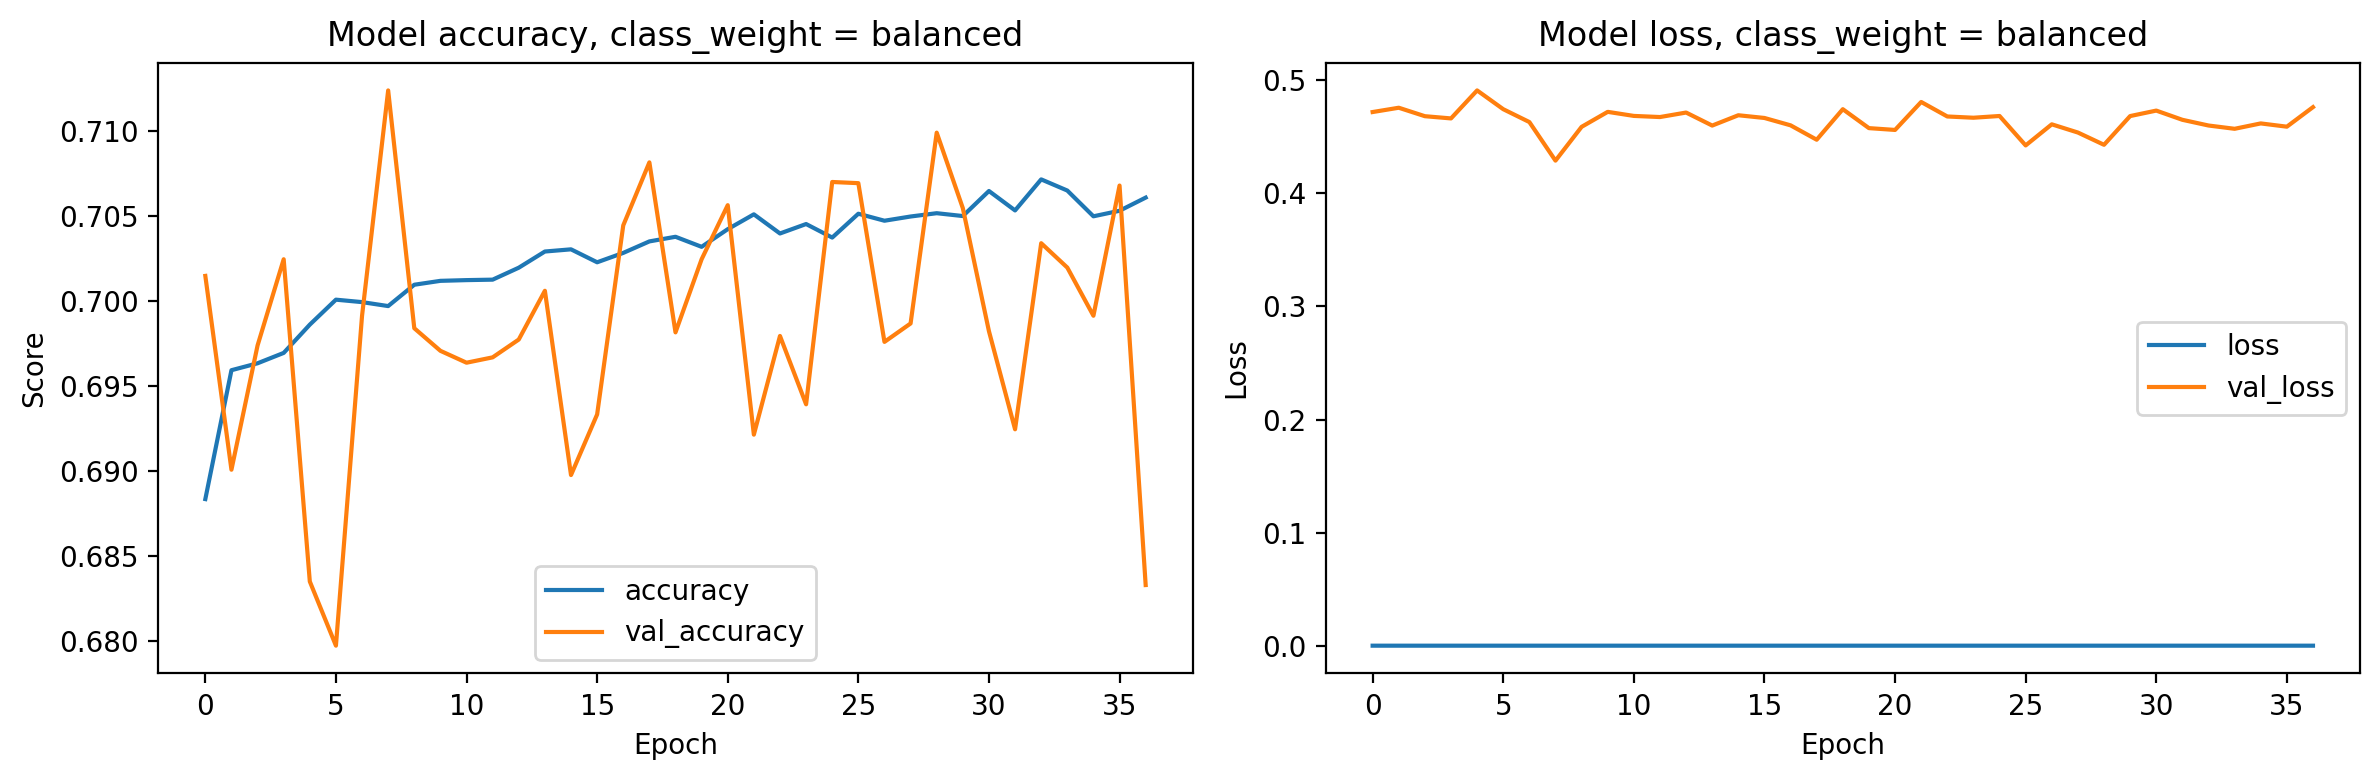

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(history_network_full_size_balanced.history['accuracy'], label = 'accuracy')
ax[0].plot(history_network_full_size_balanced.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(history_network_full_size_balanced.history['loss'], label = 'loss')
ax[1].plot(history_network_full_size_balanced.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

### Evaluating the models

#### Model without class_weights

In [ ]:
test_loss, test_acc = network_full_size.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

2978/2978 - 6s - loss: 0.2643 - accuracy: 0.8782 - 6s/epoch - 2ms/step
Test Accuracy: 87.82%


In [ ]:
y_pred = network_full_size.predict(X_test_scaled)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[83657,    30],
       [11575,    16]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

NameError: ignored

#### Model with class_weights

In [ ]:
test_loss, test_acc = network_full_size_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

2978/2978 - 6s - loss: 0.4772 - accuracy: 0.6830 - 6s/epoch - 2ms/step
Test Accuracy: 68.30%


In [ ]:
y_pred = network_full_size_balanced.predict(X_test_scaled)
y_pred = np.where(y_pred > threshold, 1,0)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[54079, 29608],
       [  597, 10994]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.99      0.65      0.78     83687
    Interested       0.27      0.95      0.42     11591

      accuracy                           0.68     95278
     macro avg       0.63      0.80      0.60     95278
  weighted avg       0.90      0.68      0.74     95278



## Neural Network on the small size dataset

### Loading and splitting the data

In [ ]:
df_small = pd.read_csv('/content/drive/MyDrive/BDA final project/data-small-size.csv')
df_small.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,35377,35378,1,58,1,0,1,22811.0,29,0,...,0,0,0,0,0,0,0,1,0,0
1,19830,19831,1,21,1,0,1,33282.0,159,0,...,0,0,0,0,0,1,0,0,1,0
2,128911,128912,1,23,1,0,1,39853.0,213,0,...,0,0,0,0,0,0,0,0,1,0
3,120005,120006,1,20,1,0,0,29252.0,146,0,...,0,0,0,0,0,1,0,0,1,0
4,180819,180820,0,63,1,0,1,45202.0,196,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_small = df_small.iloc[:,2:]
df_small.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,58,1,0,1,22811.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,21,1,0,1,33282.0,159,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,23,1,0,1,39853.0,213,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,0,0,29252.0,146,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,63,1,0,1,45202.0,196,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_small['Response'].value_counts()

0    50146
1     7020
Name: Response, dtype: int64

In [ ]:
X = df_small.drop('Response', axis = 1)
y = df_small['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [ ]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')

In [ ]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [ ]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(14292, 218)
(14292,)


### Constructing the models and tuning

In [ ]:
network_small_size = design_model('network_small_size')
network_small_size.summary()

Model: "network_small_size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                14016     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_small_size.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_network_small_size = network_small_size.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es])

Epoch 1/70
1206/1206 [==============================] - 5s 4ms/step - loss: 0.2889 - accuracy: 0.8747 - val_loss: 0.2711 - val_accuracy: 0.8731
Epoch 2/70
1206/1206 [==============================] - 5s 4ms/step - loss: 0.2725 - accuracy: 0.8766 - val_loss: 0.2704 - val_accuracy: 0.8731
Epoch 3/70
1206/1206 [==============================] - 5s 4ms/step - loss: 0.2706 - accuracy: 0.8766 - val_loss: 0.2709 - val_accuracy: 0.8731
Epoch 4/70
1206/1206 [==============================] - 5s 4ms/step - loss: 0.2692 - accuracy: 0.8766 - val_loss: 0.2707 - val_accuracy: 0.8731
Epoch 5/70
1206/1206 [==============================] - 5s 4ms/step - loss: 0.2681 - accuracy: 0.8766 - val_loss: 0.2719 - val_accuracy: 0.8731
Epoch 6/70
1206/1206 [==============================] - 5s 4ms/step - loss: 0.2672 - accuracy: 0.8764 - val_loss: 0.2706 - val_accuracy: 0.8731


In [ ]:
network_small_size_balanced = design_model('network_small_size_balanced')
network_small_size_balanced.summary()

Model: "network_small_size_balanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                14016     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_small_size_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'Recall'])

In [ ]:
counts_small_size = np.bincount(y_train)
weight_for_0 = 1.0 / counts_small_size[0]
weight_for_1 = 1.0 / counts_small_size[1]
class_weight_small_size = {0: weight_for_0, 1: weight_for_1}
print('Weight for 0(Not interested) {:.10f}, weight for 1(Interested) {:.10f}'.format(weight_for_0, weight_for_1))

Weight for 0(Not interested) 0.0000266177, weight for 1(Interested) 0.0001885014


In [ ]:
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts_small_size[1], 100 * float(counts_small_size[1]) / len(y_train)))

Number of positive samples in training data: 5305 (12.37% of total)


In [ ]:
network_small_size_balanced_history = network_small_size_balanced.fit(X_train_scaled, 
                             y_train, 
                             validation_split = 0.1, 
                             epochs = 70, 
                             callbacks = [es], 
                             class_weight = class_weight_small_size)

Epoch 1/70
1206/1206 [==============================] - 9s 6ms/step - loss: 2.2065e-05 - accuracy: 0.6743 - recall: 0.9034 - val_loss: 0.4761 - val_accuracy: 0.6880 - val_recall: 0.9522
Epoch 2/70
1206/1206 [==============================] - 7s 6ms/step - loss: 2.0358e-05 - accuracy: 0.6851 - recall: 0.9336 - val_loss: 0.4543 - val_accuracy: 0.6987 - val_recall: 0.9393
Epoch 3/70
1206/1206 [==============================] - 7s 6ms/step - loss: 2.0162e-05 - accuracy: 0.6897 - recall: 0.9364 - val_loss: 0.4662 - val_accuracy: 0.6940 - val_recall: 0.9485
Epoch 4/70
1206/1206 [==============================] - 8s 6ms/step - loss: 2.0064e-05 - accuracy: 0.6941 - recall: 0.9303 - val_loss: 0.4440 - val_accuracy: 0.7036 - val_recall: 0.9320
Epoch 5/70
1206/1206 [==============================] - 8s 6ms/step - loss: 1.9945e-05 - accuracy: 0.6960 - recall: 0.9332 - val_loss: 0.4735 - val_accuracy: 0.7022 - val_recall: 0.9412
Epoch 6/70
1206/1206 [==============================] - 8s 6ms/step - 

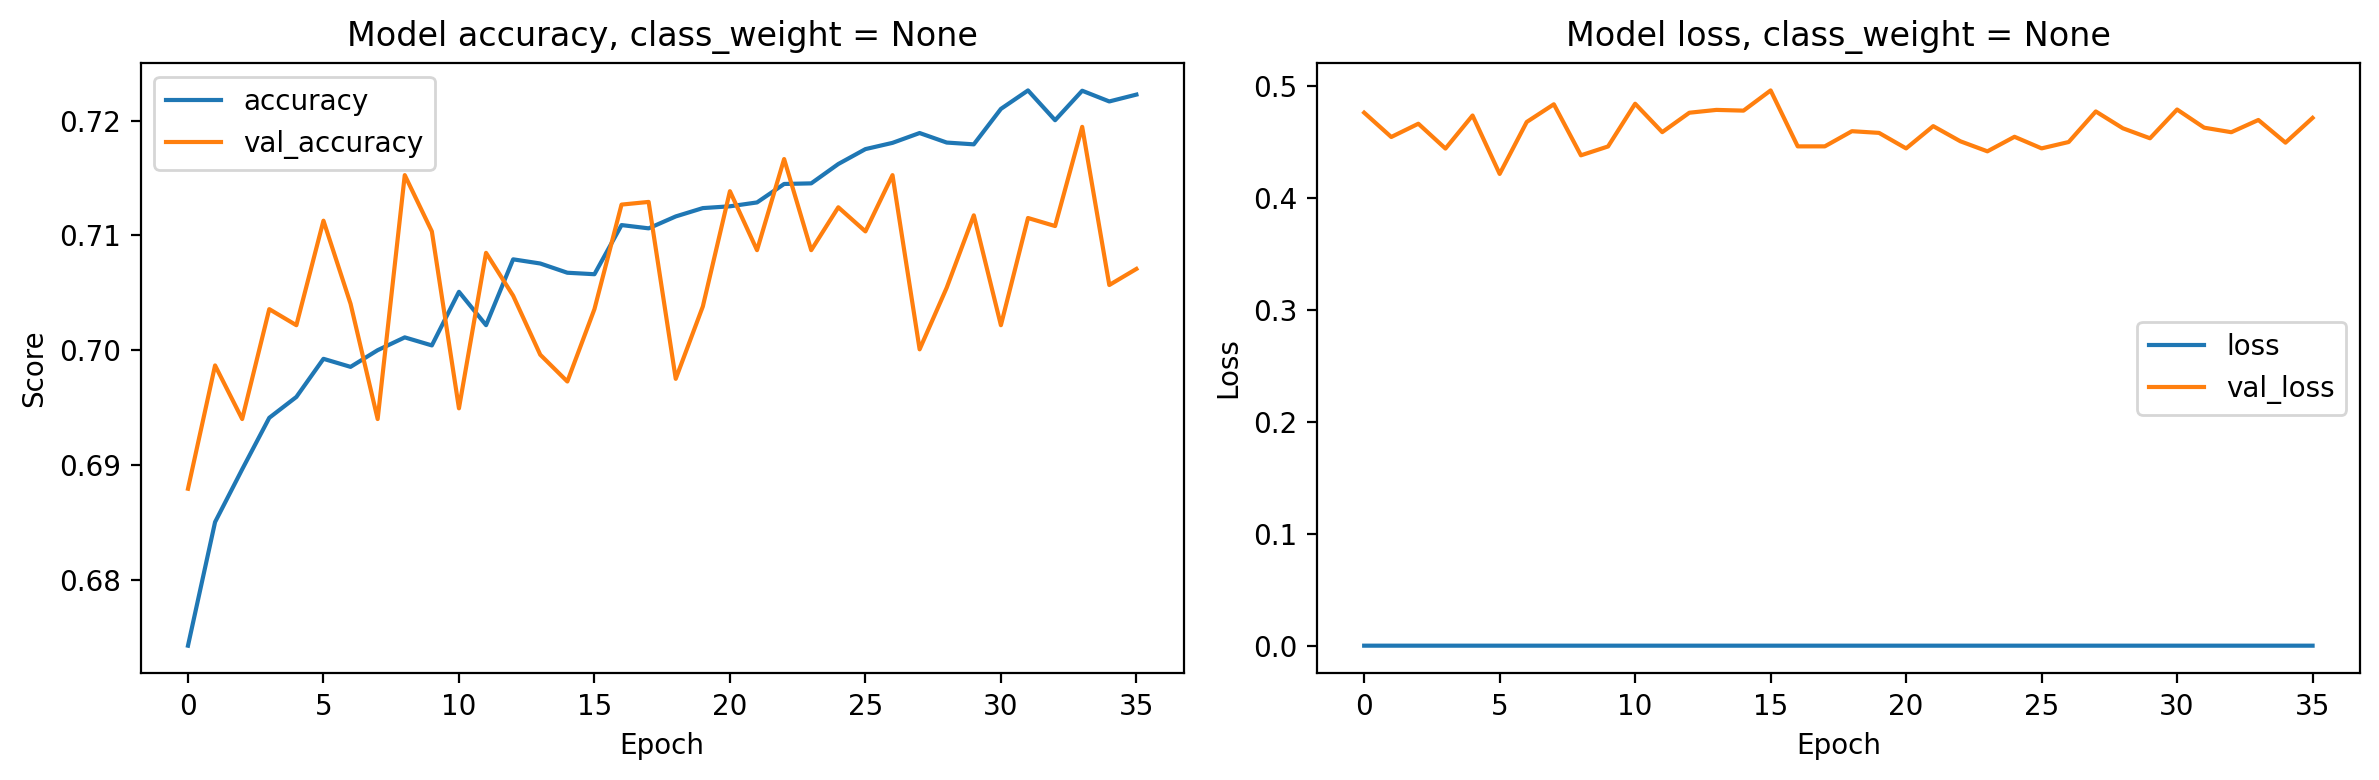

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(network_small_size_balanced_history.history['accuracy'], label = 'accuracy')
ax[0].plot(network_small_size_balanced_history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = None', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(network_small_size_balanced_history.history['loss'], label = 'loss')
ax[1].plot(network_small_size_balanced_history.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = None', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

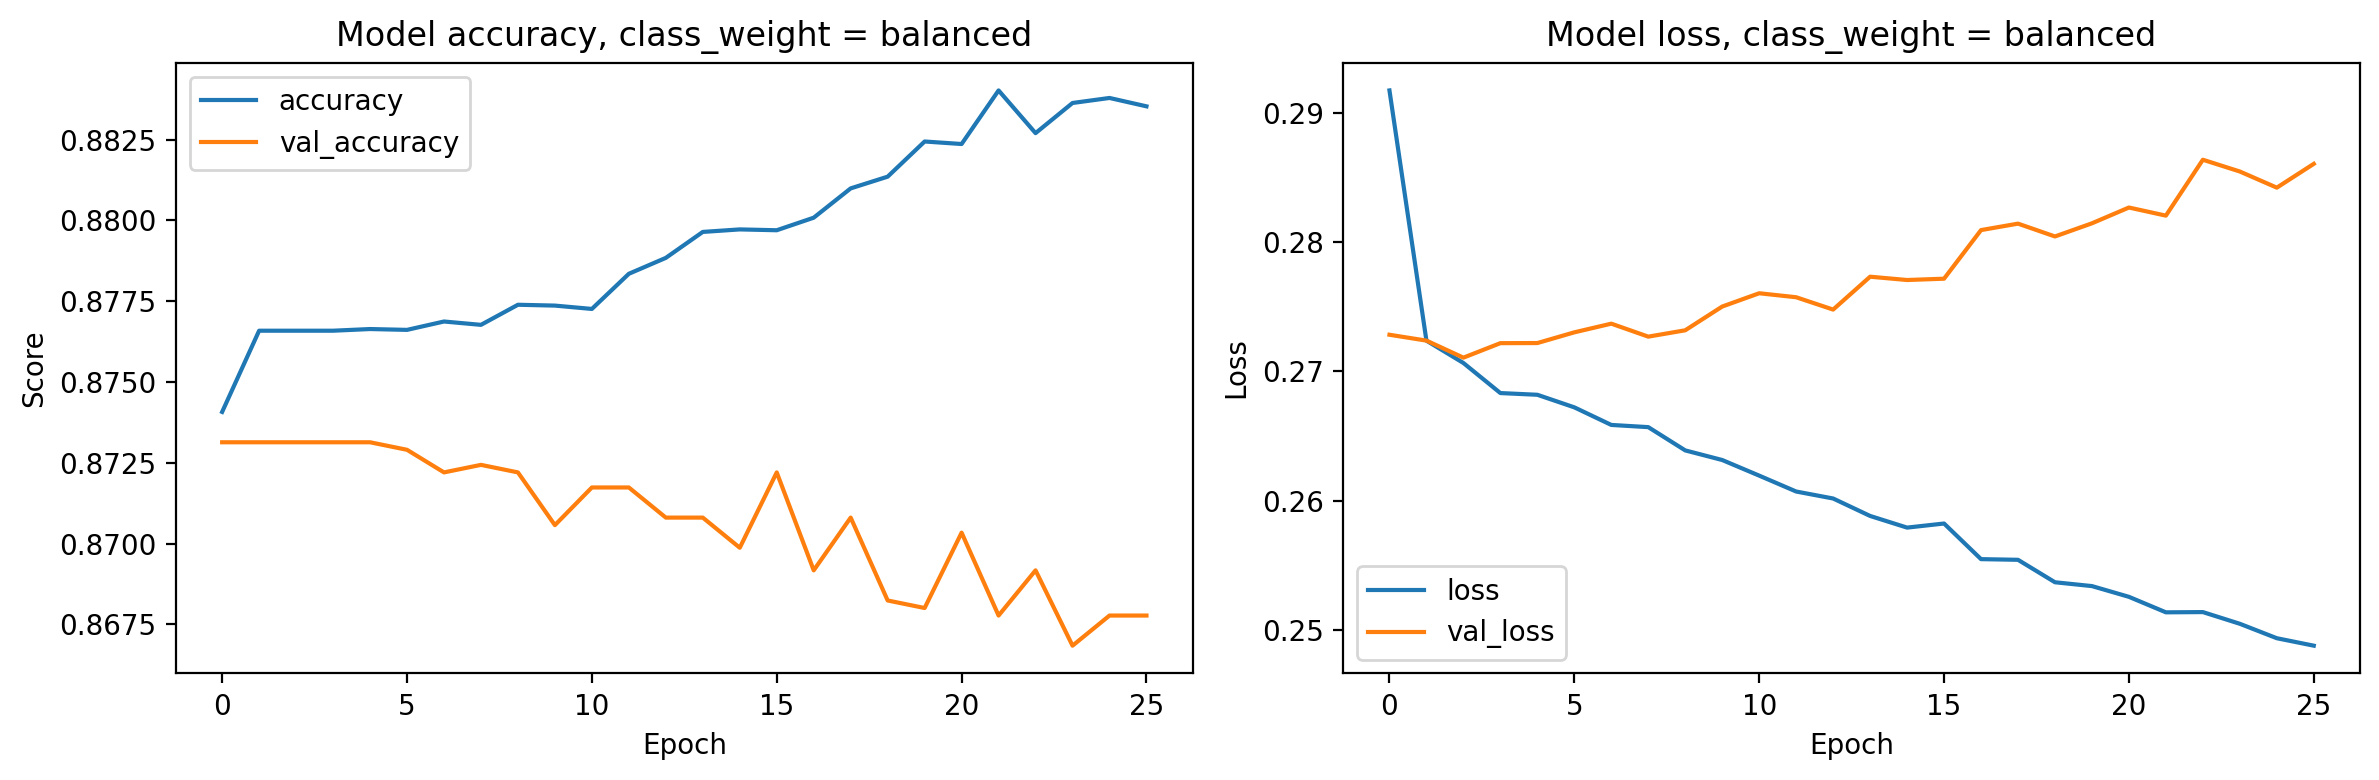

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)
ax[0].plot(history_network_small_size.history['accuracy'], label = 'accuracy')
ax[0].plot(history_network_small_size.history['val_accuracy'], label = 'val_accuracy')
ax[0].set(title = 'Model accuracy, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Score')
ax[0].legend()

ax[1].plot(history_network_small_size.history['loss'], label = 'loss')
ax[1].plot(history_network_small_size.history['val_loss'], label = 'val_loss')
ax[1].set(title = 'Model loss, class_weight = balanced', xlabel = 'Epoch', ylabel = 'Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

### Evaluating the models

#### Model without class_weights

In [ ]:
test_loss, test_acc = network_small_size.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

447/447 - 1s - loss: 0.2756 - accuracy: 0.8766 - 1s/epoch - 3ms/step
Test Accuracy: 87.66%


In [ ]:
def convert_y_pred_classes(y_pred, threshold):
  y_pred = np.where(y_pred > threshold, 1,0)
  return y_pred

In [ ]:
y_pred = network_small_size.predict(X_test_scaled)
y_pred = convert_y_pred_classes(y_pred, 0.5)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[12452,   125],
       [ 1638,    77]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      0.99      0.93     12577
    Interested       0.38      0.04      0.08      1715

      accuracy                           0.88     14292
     macro avg       0.63      0.52      0.51     14292
  weighted avg       0.82      0.88      0.83     14292



#### Model with class_weights

In [ ]:
test_loss, test_acc, recall = network_small_size_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))
print('Recall: {}'.format(recall))

447/447 - 2s - loss: 0.4811 - accuracy: 0.7007 - recall: 0.9050 - 2s/epoch - 4ms/step
Test Accuracy: 70.07%
Recall: 0.9049562811851501


In [ ]:
y_pred = network_small_size_balanced.predict(X_test_scaled)
y_pred = convert_y_pred_classes(y_pred, 0.5)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[8462, 4115],
       [ 163, 1552]])

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.98      0.67      0.80     12577
    Interested       0.27      0.90      0.42      1715

      accuracy                           0.70     14292
     macro avg       0.63      0.79      0.61     14292
  weighted avg       0.90      0.70      0.75     14292



## Neural network on the small size manually balanced dataset

### Loading and splitting the data 

In [ ]:
df_small_manually_balanced = pd.read_csv('/content/drive/MyDrive/BDA final project/data-small-size-balanced.csv')
df_small_manually_balanced.head() 

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,194037,194038,1,43,1,0,1,2630.0,46,1,...,0,0,0,0,0,0,0,1,0,0
1,166096,166097,1,28,1,0,1,2630.0,281,1,...,0,0,1,0,0,0,0,1,0,0
2,228045,228046,0,34,1,0,1,50812.0,145,1,...,0,0,0,0,0,0,0,1,0,0
3,281334,281335,1,43,1,0,1,39089.0,21,1,...,0,0,0,0,0,0,0,1,0,0
4,102730,102731,1,44,1,0,1,34162.0,115,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_small_manually_balanced = df_small_manually_balanced.iloc[:, 2:]
df_small_manually_balanced.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,43,1,0,1,2630.0,46,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,28,1,0,1,2630.0,281,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,34,1,0,1,50812.0,145,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,43,1,0,1,39089.0,21,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,44,1,0,1,34162.0,115,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_small_manually_balanced['Response'].value_counts()

1    28583
0    28583
Name: Response, dtype: int64

In [ ]:
X = df_small_manually_balanced.drop('Response', axis = 1)
y = df_small_manually_balanced['Response']

In [ ]:
X_train, _, y_train, _ = train_test_split(X, y, random_state = 12)

In [ ]:
test_size = len(df_small_manually_balanced.sample(frac=0.33))
test_df = df_full_size.sample(n=test_size)
test_df['Response'].value_counts()

0    16556
1     2309
Name: Response, dtype: int64

In [ ]:
X_test = test_df.drop('Response', axis = 1)
y_test = test_df['Response']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(18865, 218)
(18865,)


In [ ]:
scaled_features = ['Age', 'Annual_Premium', 'Vintage']
ct = ColumnTransformer([('scaling', StandardScaler(), scaled_features)], remainder = 'passthrough')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [ ]:
#Example of scaled feature
X_train_scaled[0][0]

0.6370230422525529

### Creating and tuning the models

In [ ]:
network_small_size_manually_balanced = design_model('network_small_size_manually_balanced')
network_small_size_manually_balanced.summary()

Model: "network_small_size_manually_balanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                14016     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_small_size_manually_balanced.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [51]:
network_small_size_manually_balanced_history = network_small_size_manually_balanced.fit(
    X_train_scaled, 
    y_train, 
    validation_split = 0.1, 
    epochs = 70, 
    callbacks = [es]                       
)

Epoch 1/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3944 - accuracy: 0.8143 - val_loss: 0.4501 - val_accuracy: 0.7880
Epoch 2/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3934 - accuracy: 0.8151 - val_loss: 0.4527 - val_accuracy: 0.7866
Epoch 3/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3944 - accuracy: 0.8146 - val_loss: 0.4562 - val_accuracy: 0.7868
Epoch 4/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3926 - accuracy: 0.8151 - val_loss: 0.4528 - val_accuracy: 0.7887
Epoch 5/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3920 - accuracy: 0.8148 - val_loss: 0.4568 - val_accuracy: 0.7833
Epoch 6/70
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3933 - accuracy: 0.8138 - val_loss: 0.4574 - val_accuracy: 0.7831


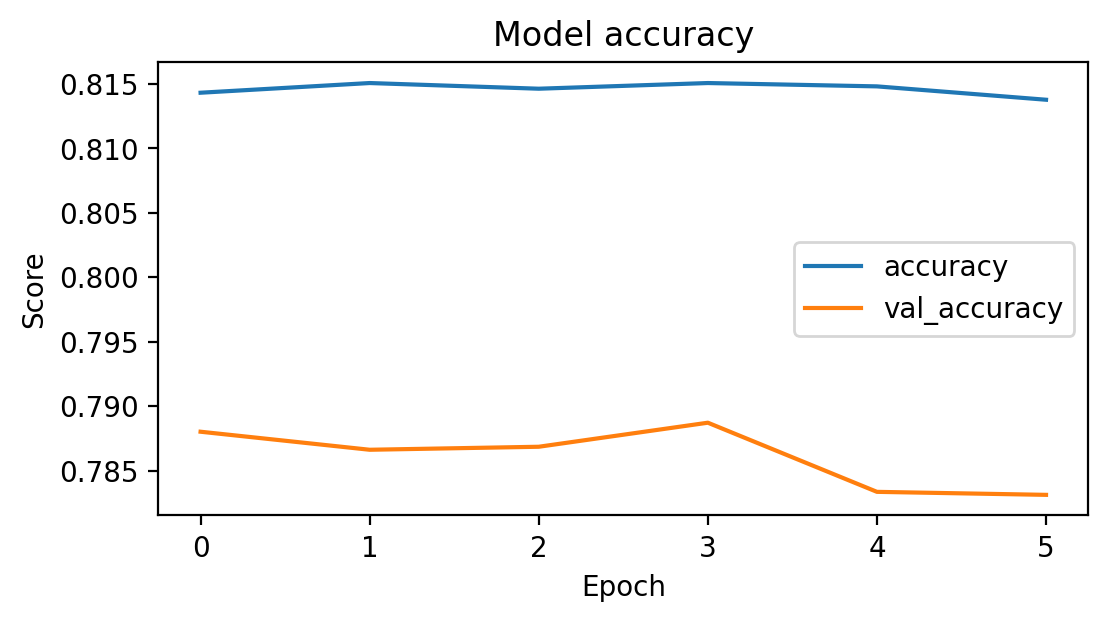

In [55]:
fig, ax = plt.subplots(figsize=(6,3), dpi = 200)
ax.plot(network_small_size_manually_balanced_history.history['accuracy'], label = 'accuracy')
ax.plot(network_small_size_manually_balanced_history.history['val_accuracy'], label = 'val_accuracy')
ax.set(title = 'Model accuracy', xlabel = 'Epoch', ylabel = 'Score')
ax.legend()

plt.show()

### Evaluating the model

In [56]:
test_loss, test_acc = network_small_size_manually_balanced.evaluate(X_test_scaled, y_test, verbose = 2)
print('Test Accuracy: {:.2%}'.format(test_acc))

590/590 - 2s - loss: 0.4988 - accuracy: 0.7042 - 2s/epoch - 3ms/step
Test Accuracy: 70.42%


In [57]:
y_pred = network_small_size_manually_balanced.predict(X_test_scaled)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

In [58]:
print(confusion_matrix(y_test, y_pred))

[[11138  5418]
 [  163  2146]]


In [59]:
print(classification_report(y_test, y_pred, target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.99      0.67      0.80     16556
    Interested       0.28      0.93      0.43      2309

      accuracy                           0.70     18865
     macro avg       0.63      0.80      0.62     18865
  weighted avg       0.90      0.70      0.75     18865

